In [1]:
import geopandas as gpd
import pathlib as Path
import glob
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.merge import merge
import pandas as pd

In [2]:
path_ = Path.Path('Dataset PaCaBa')

In [3]:
files = glob.glob(f'{path_}/*/*.geojson')
files

['Dataset PaCaBa/RawImageData/Vehicles_Image2.geojson',
 'Dataset PaCaBa/RawImageData/Vehicles_Image1.geojson']

In [4]:
gdf_image_list = []
for file in files:
    gdf_image = gpd.read_file(file)
    print(gdf_image.head())
    gdf_image_list.append(gdf_image)

                                            geometry
0  MULTIPOLYGON (((427656.375 4582985.982, 427658...
1  MULTIPOLYGON (((427653.520 4582984.872, 427654...
2  MULTIPOLYGON (((427655.741 4582979.161, 427657...
3  MULTIPOLYGON (((427660.024 4582975.671, 427661...
4  MULTIPOLYGON (((427657.803 4582972.181, 427659...
                                            geometry
0  MULTIPOLYGON (((427642.416 4583013.267, 427644...
1  MULTIPOLYGON (((427648.444 4582998.673, 427650...
2  MULTIPOLYGON (((427654.948 4582979.954, 427656...
3  MULTIPOLYGON (((427658.755 4582979.320, 427660...
4  MULTIPOLYGON (((427659.548 4582972.023, 427660...


Each GeoDataFrames have a column named geometry that contains multipolygon geometries for each detected vehicle.

Each entry in the geometry column represents a vehicle's spatial footprint on the Earth's surface as a multipolygon, which is a common format for representing complex shapes in geospatial data.

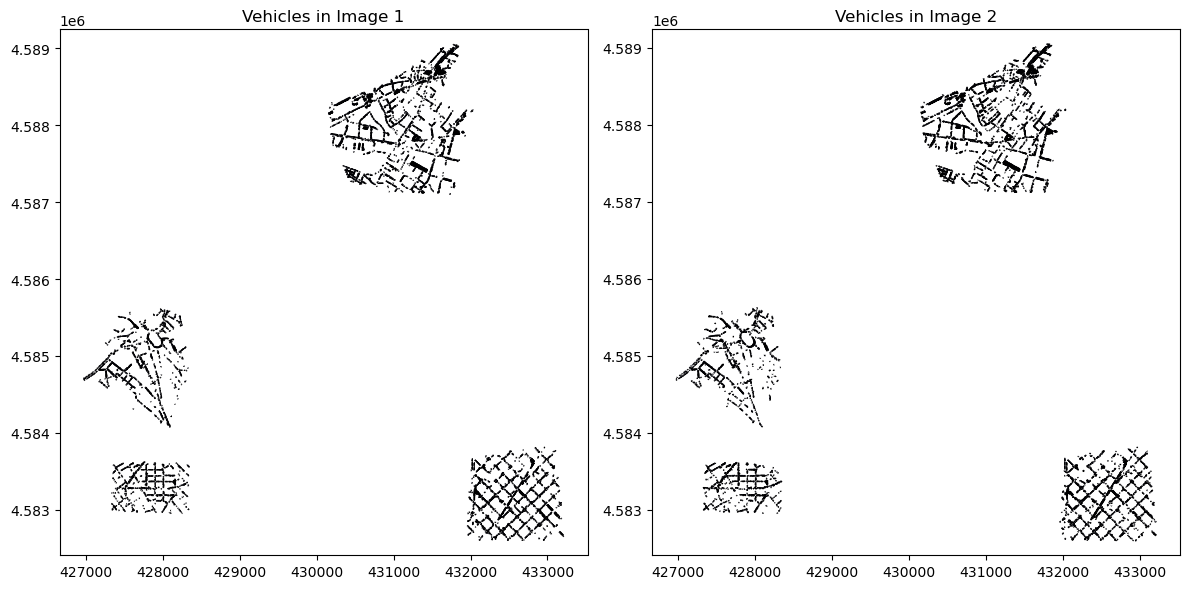

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(len(gdf_image_list)):
    gdf_image_list[i].plot(ax=ax[i], color='blue', edgecolor='k')
    ax[i].set_title(f'Vehicles in Image {i + 1}')
    ax[i].axis('equal')

plt.tight_layout()
plt.show()

The plots above visualize the locations of vehicles as captured in two different images from the dataset. Each polygon represents the outline of a vehicle:

The plots give a spatial representation of how vehicles are distributed within each image. This visualization can help in understanding the density and arrangement of parked cars, which is crucial for tasks such as optimizing parking space allocation or traffic flow analysis.

In [6]:
# Since the file loading and plotting process will be the same for each file, we can create a function to handle this
def load_and_plot_image(file_path, title):
    with rasterio.open(file_path) as src:
        img = src.read()
        band_count = src.count

    fig, ax = plt.subplots(figsize=(6, 6))
    if band_count == 1:
        show(img[0], ax=ax, title=f'{title} - Single Band')
    else:
        show(img, ax=ax, title=f'{title} - Multiple Bands')
    plt.show()

In [7]:
# File paths for the 8 regions
image_paths = glob.glob(f'{path_}/*/*.tif')
image_paths

['Dataset PaCaBa/RawImageData/Image1_Region1_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image2_Region4_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image1_Region4_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image2_Region1_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image1_Region3_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image2_Region3_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image2_Region2_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image1_Region2_Masked.tif']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


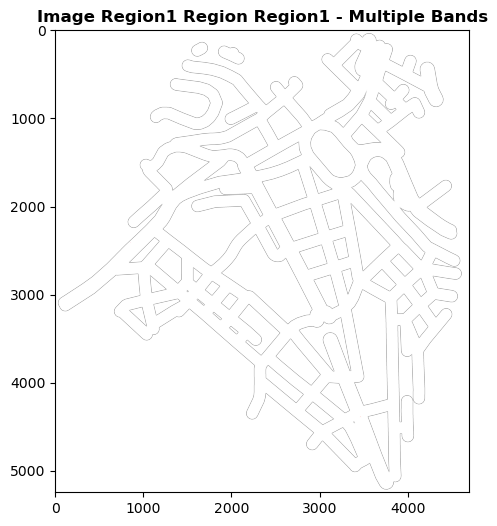

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


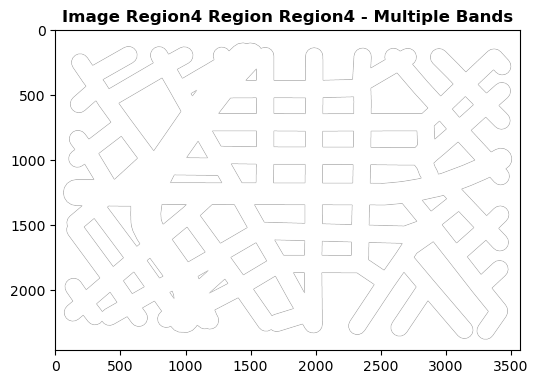

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


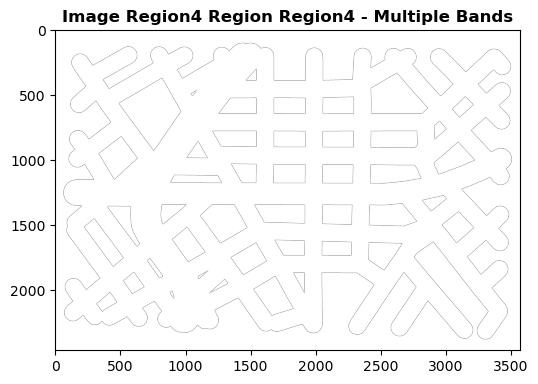

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


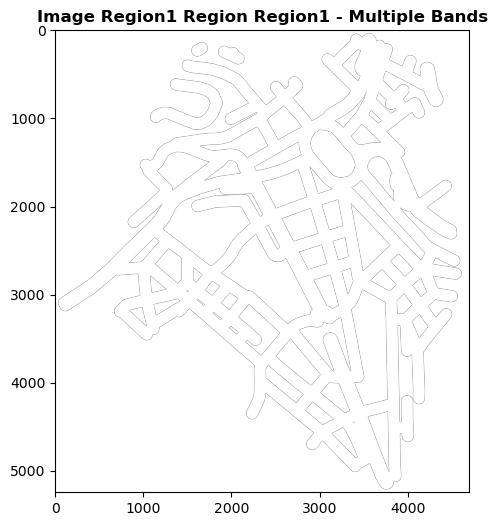

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


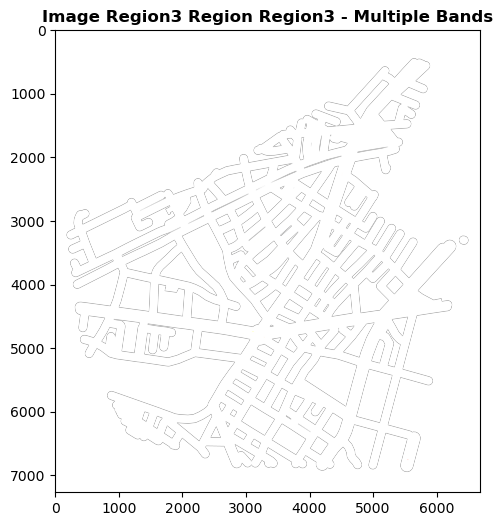

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


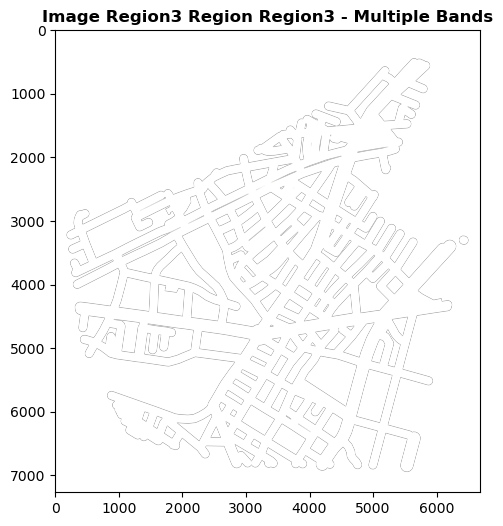

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


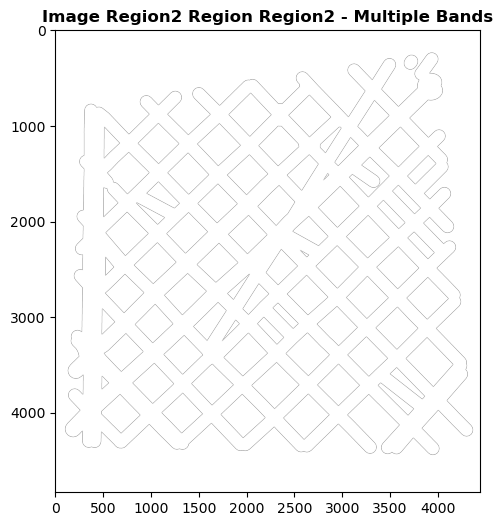

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


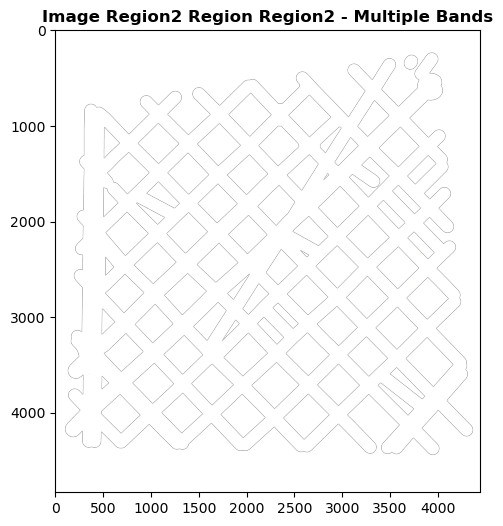

In [8]:
# Now we loop through each file path, load the image, and plot it
for file_path in image_paths:
    # Extract the region and image number from the file path for the title
    region = file_path.split('_')[-2]
    image_number = file_path.split('_')[1]
    load_and_plot_image(file_path, title=f'Image {image_number} Region {region}')

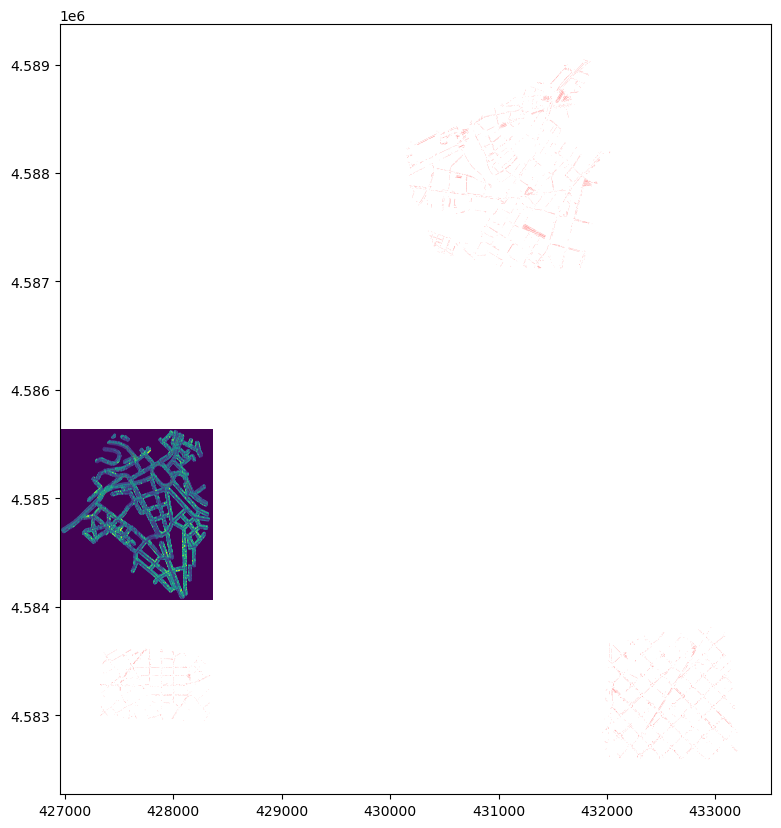

In [9]:
gdf = gpd.read_file(f'{path_}/RawImageData/Vehicles_Image1.geojson')

# Load TIF image
with rasterio.open(f'{path_}/RawImageData/Image1_Region1_Masked.tif') as src:
    img = src.read(1)  # Assuming a single band image
    transform = src.transform
    crs = src.crs

# Transform GeoDataFrame to match CRS of the image
gdf = gdf.to_crs(crs)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
show(img, transform=transform, ax=ax)
gdf.plot(ax=ax, color='red', alpha=0.5)  # Adjust color and transparency as needed
plt.show()

In [10]:
# Function to overlay annotations on images
def overlay_annotations(image_path, geojson_path, title):
    # Load GeoJSON data
    gdf = gpd.read_file(geojson_path)

    # Load TIF image
    with rasterio.open(image_path) as src:
        img = src.read(1)  # Assuming a single band image
        transform = src.transform
        crs = src.crs

    # Transform GeoDataFrame to match CRS of the image
    gdf = gdf.to_crs(crs)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    show(img, transform=transform, ax=ax)
    gdf.plot(ax=ax, color='red', alpha=0.5)  # Adjust color and transparency as needed
    plt.title(title)
    plt.show()

In [11]:
geojson_paths = [
    f'{path_}/RawImageData/Vehicles_Image1.geojson',
    f'{path_}/RawImageData/Vehicles_Image2.geojson'
]

geojson_image1_path = f'{path_}/RawImageData/Image1_Region1_Masked.tif'
geojson_image2_path = f'{path_}/RawImageData/Image2_Region1_Masked.tif'

# File paths for the 8 regions (4 for each image)
image_paths_image1 = [
    f'{path_}/RawImageData/Image1_Region1_Masked.tif',
    f'{path_}/RawImageData/Image1_Region2_Masked.tif',
    f'{path_}/RawImageData/Image1_Region3_Masked.tif',
    f'{path_}/RawImageData/Image1_Region4_Masked.tif'
]

image_paths_image2 = [
    f'{path_}/RawImageData/Image2_Region1_Masked.tif',
    f'{path_}/RawImageData/Image2_Region2_Masked.tif',
    f'{path_}/RawImageData/Image2_Region3_Masked.tif',
    f'{path_}/RawImageData/Image2_Region4_Masked.tif'
]


image_paths_image1

['Dataset PaCaBa/RawImageData/Image1_Region1_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image1_Region2_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image1_Region3_Masked.tif',
 'Dataset PaCaBa/RawImageData/Image1_Region4_Masked.tif']

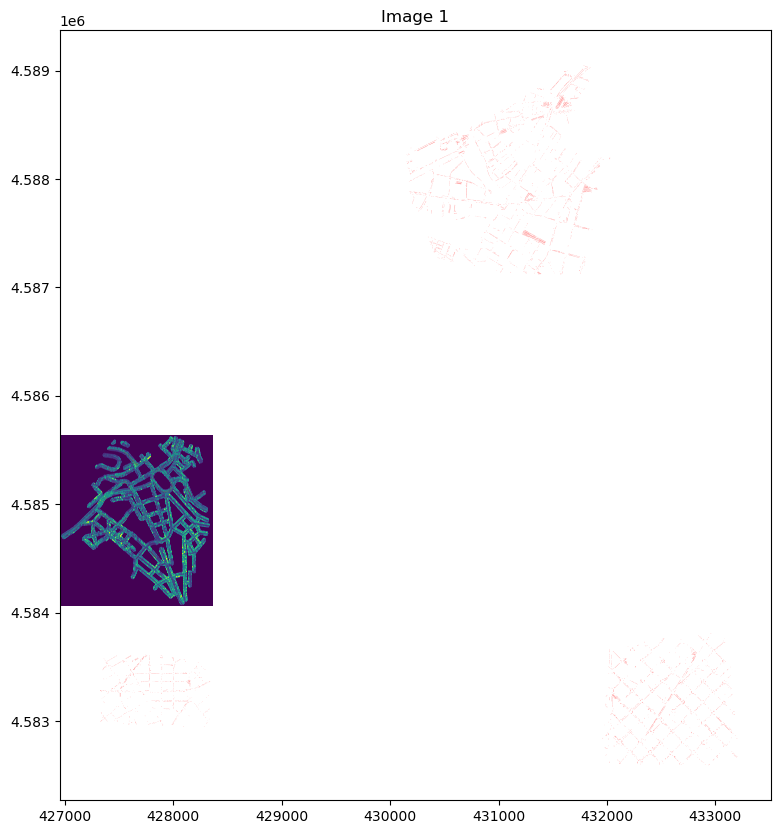

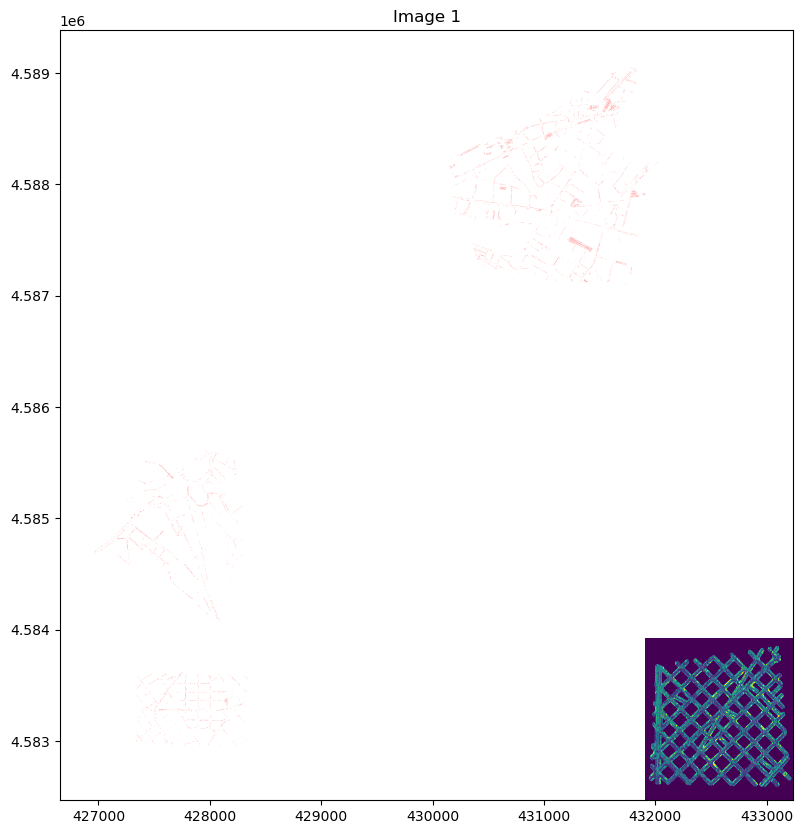

In [13]:
# Loop through each file path for image 1, load the image, and overlay annotations
for image_path, geojson_path in zip(image_paths_image1, geojson_paths):
    overlay_annotations(image_path, geojson_path, 'Image 1')

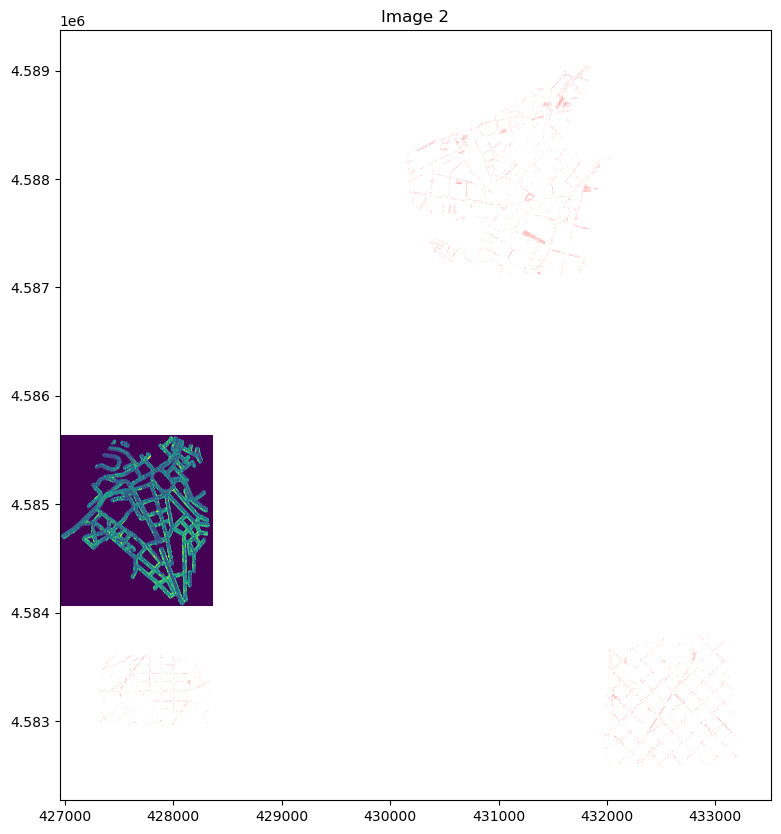

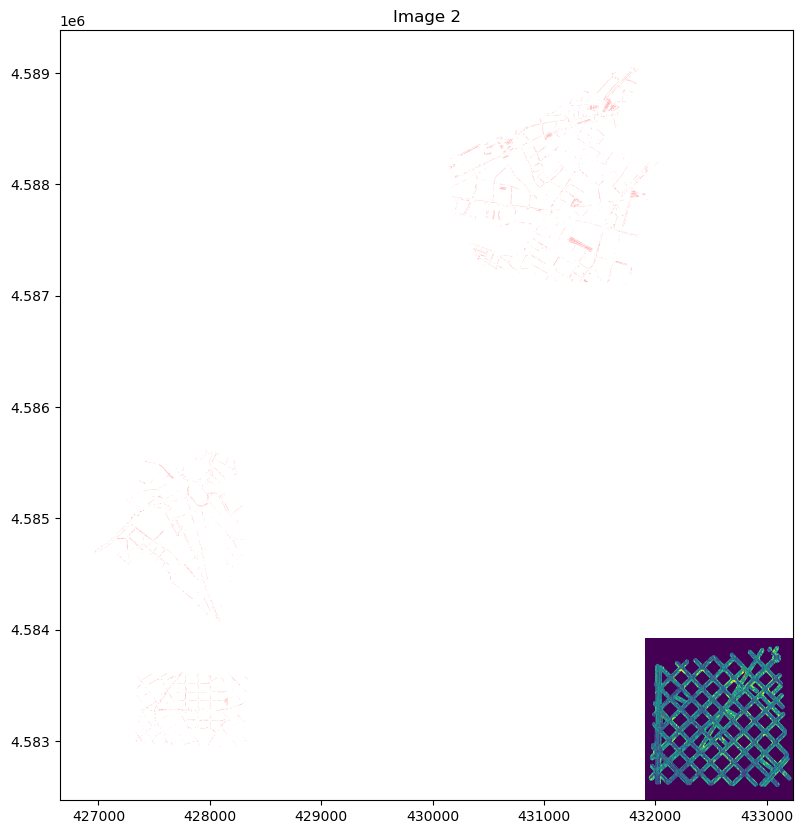

In [14]:

# Do the same for image 2
for image_path, geojson_path in zip(image_paths_image2, geojson_paths):
    overlay_annotations(image_path, geojson_path, 'Image 2')

In [21]:
# Function to create a mosaic from multiple images
def create_mosaic(image_paths, output_path):
    # Read the images as datasets
    datasets = [rasterio.open(path) for path in image_paths]
    # Merge datasets
    mosaic, out_transform = merge(datasets)
    # Copy the metadata
    out_meta = datasets[0].meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": out_transform
    })
    # Write the mosaic to a new TIFF file
    with rasterio.open(output_path, "w", **out_meta) as dest:
        dest.write(mosaic)
    return output_path


# Function to overlay GeoJSON annotations on a mosaic
def overlay_annotations(mosaic_path, geojson_paths):
    # Read the mosaic
    with rasterio.open(mosaic_path) as mosaic_src:
        mosaic_img = mosaic_src.read(1)
        mosaic_transform = mosaic_src.transform
        crs = mosaic_src.crs
    
    # Merge GeoJSON files
    gdf_list = [gpd.read_file(g) for g in geojson_paths]
    merged_gdf = pd.concat(gdf_list, ignore_index=True)
    merged_gdf = gpd.GeoDataFrame(merged_gdf)
    merged_gdf.crs = gdf_list[0].crs
    # Convert GeoDataFrame to the CRS of the mosaic
    merged_gdf = merged_gdf.to_crs(crs)

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 10))
    show(mosaic_img, transform=mosaic_transform, ax=ax)
    merged_gdf.plot(ax=ax, color='red', alpha=0.5)
    plt.show()


In [26]:
files

['Dataset PaCaBa/RawImageData/Vehicles_Image2.geojson',
 'Dataset PaCaBa/RawImageData/Vehicles_Image1.geojson']

In [27]:
image_path

'Dataset PaCaBa/RawImageData/Image2_Region2_Masked.tif'

In [24]:
geojson_paths = [
    'Dataset PaCaBa/RawImageData/Vehicles_Image1.geojson',
    'Dataset PaCaBa/RawImageData/Vehicles_Image2.geojson'
]
image_paths = [
    'Dataset PaCaBa/RawImageData/Image1_Region1_Masked.tif',
    'Dataset PaCaBa/RawImageData/Image1_Region2_Masked.tif',
    'Dataset PaCaBa/RawImageData/Image1_Region3_Masked.tif',
    'Dataset PaCaBa/RawImageData/Image1_Region4_Masked.tif',
    'Dataset PaCaBa/RawImageData/Image2_Region1_Masked.tif',
    'Dataset PaCaBa/RawImageData/Image2_Region2_Masked.tif',
    'Dataset PaCaBa/RawImageData/Image2_Region3_Masked.tif',
    'Dataset PaCaBa/RawImageData/Image2_Region4_Masked.tif'
]

/Users/johnomole/anaconda3/lib/python3.10/site-packages/rasterio/merge.py:359: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  temp_src = src.read(


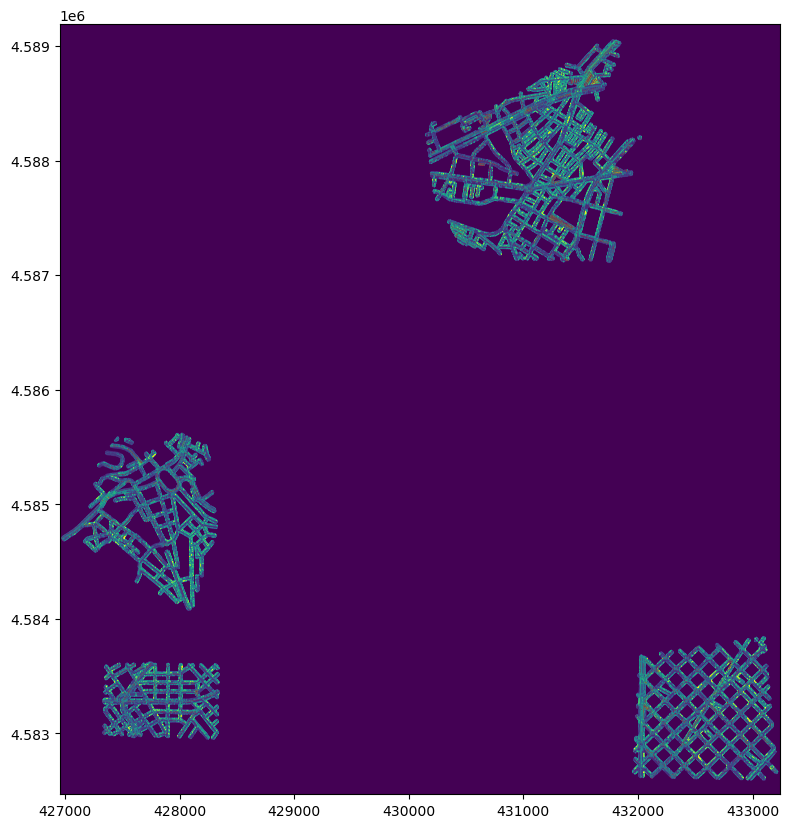

In [25]:
# Create the mosaic
mosaic_path = create_mosaic(image_paths, 'path_to_output_mosaic_tif')

# Overlay the annotations on the mosaic
overlay_annotations(mosaic_path, geojson_paths)